In [1]:
import os
import sys
import jax
from neuron import h, gui
import braincell
from utils import *

## load gol mor
parent_folder_path = os.path.join(os.getcwd(), 'golgi_NEURON')
sys.path.append(parent_folder_path)
from GOL import Golgi_morpho_1

## load gol mod
current_dir = os.getcwd()
mod_path = os.path.join(current_dir, 'golgi_NEURON', 'mod_gol')
os.system(f'nrnivmodl {mod_path}')

current_dir = os.path.dirname(os.path.abspath('.'))
project_root = os.path.abspath(os.path.join(current_dir, '..', '..'))
dendritex_path = os.path.join(project_root, 'braincell')
sys.path.insert(0, dendritex_path)

brainstate.environ.set(precision=64)
#jax.config.update("jax_disable_jit", True)

# set visible GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
devices = jax.devices()
print("available devices:", devices)

--No graphics will be displayed.
/home/swl/anaconda3/envs/braincell/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set


/home/swl/braincell/examples/MC13_golgi_model
Mod files: "/home/swl/braincell/examples/MC13_golgi_model/golgi_NEURON/mod_gol//home/swl/braincell/examples/MC13_golgi_model/golgi_NEURON/mod_gol/Cav12.mod" "/home/swl/braincell/examples/MC13_golgi_model/golgi_NEURON/mod_gol//home/swl/braincell/examples/MC13_golgi_model/golgi_NEURON/mod_gol/Cav13.mod" "/home/swl/braincell/examples/MC13_golgi_model/golgi_NEURON/mod_gol//home/swl/braincell/examples/MC13_golgi_model/golgi_NEURON/mod_gol/Cav2_3.mod" "/home/swl/braincell/examples/MC13_golgi_model/golgi_NEURON/mod_gol//home/swl/braincell/examples/MC13_golgi_model/golgi_NEURON/mod_gol/Cav3_1.mod" "/home/swl/braincell/examples/MC13_golgi_model/golgi_NEURON/mod_gol//home/swl/braincell/examples/MC13_golgi_model/golgi_NEURON/mod_gol/cdp5StCmod.mod" "/home/swl/braincell/examples/MC13_golgi_model/golgi_NEURON/mod_gol//home/swl/braincell/examples/MC13_golgi_model/golgi_NEURON/mod_gol/GOLGI_Ampa_mossy_det_vi.mod" "/home/swl/braincell/examples/MC13_golgi_m

## NEURON


5389 lines read
!!!!!!! Import3d_Section[0]
0: (-24.140000, 11.000000, 0.000000)
1: (-22.770000, 12.060000, 0.000000)
2: (-21.020000, 13.340000, 0.000000)
3: (-19.350000, 14.690000, 0.000000)
4: (-16.790000, 15.950000, 0.000000)
5: (-14.900000, 17.070000, 0.000000)
6: (-14.830000, 17.070000, 0.000000)
7: (-13.990000, 17.710000, 0.000000)
8: (-13.770000, 17.770000, 0.000000)
9: (-12.880000, 17.750000, 0.000000)
10: (-12.810000, 17.670000, 0.000000)
11: (-11.220000, 16.280000, 0.000000)
12: (-9.950000, 14.460000, 0.000000)
13: (-9.800000, 14.390000, 0.000000)
14: (-8.880000, 13.020000, 0.000000)
15: (-8.880000, 12.950000, 0.000000)
16: (-8.650000, 11.090000, 0.000000)
17: (-8.650000, 10.860000, 0.000000)
18: (-9.620000, 8.380000, 0.000000)
19: (-9.700000, 8.300000, 0.000000)
20: (-10.950000, 6.340000, 0.000000)
21: (-11.100000, 6.200000, 0.000000)
22: (-13.300000, 4.570000, 0.000000)
23: (-13.380000, 4.420000, 0.000000)
24: (-14.460000, 3.120000, 0.000000)
25: (-14.620000, 2.910000, 0.0

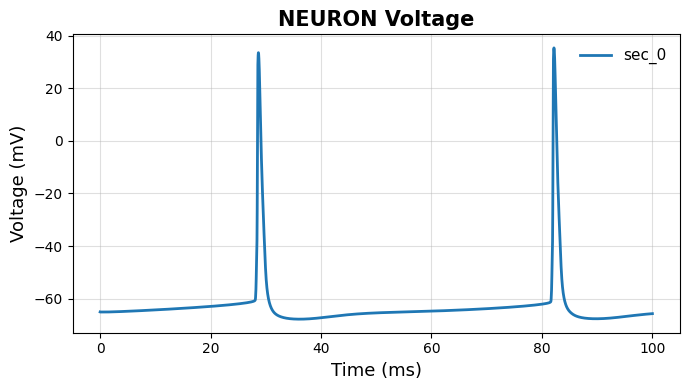

In [2]:
## create cell in NEURON
cell_neuron = Golgi_morpho_1(el=-55, gl=1, ghcn1=1, ghcn2=1, ena=60, gna=1, ek=-80, gkv11=1, gkv34=1, gkv43=1)
## add stim
stim = step_stim(cell_neuron, delay=0, dur=10, amp=0.0)
## simulation
t_neuron, v_neuron, spike_neuron = NeuronRun(cell=cell_neuron, stim=stim, tstop=100, dt=0.01, v_init=-65)
## plot voltage traces
plot_voltage_traces(t_neuron, v_neuron, indices=[0], title='NEURON Voltage')

In [3]:
# def run_neuron_with_input(
#     amp: float,
#     dur: float,
#     delay: float = 0.0,
#     tstop: float = 100.0,
#     dt: float = 0.01,
#     v_init: float = -65.0
# ):
#     h('forall delete_section()')
#     cell = Golgi_morpho_1(
#         el=-55, gl=1, ghcn1=1, ghcn2=1,
#         ena=60, gna=1, ek=-80,
#         gkv11=1, gkv34=1, gkv43=1
#     )
#     stim = step_stim(cell, delay=delay, dur=dur, amp=amp)

#     # 运行仿真
#     t, v, spikes = NeuronRun(cell=cell, stim=stim, tstop=tstop, dt=dt, v_init=v_init)
#     return t, v, spikes

# amps = [0.1* i for i in range(100)]
# results = [run_neuron_with_input(amp=a, dur=10.0) for a in amps]

# t_list, v_list, spikes_list = zip(*results)
# for i, (t, v) in enumerate(zip(t_list, v_list)):
#     plot_voltage_traces(t, v, indices=[0], title=f'NEURON Cell #{i}')


In [4]:
class Golgi(braincell.MultiCompartment):
    def __init__(self, popsize, morphology, el, gl, gh1, gh2, ek, gkv11, gkv34, gkv43, ena, gnarsg, gcagrc=0, gcav23=0,
                 gcav31=0, gkca31=0, Gl=0, El=-65, V_init=-65, solver='ind_exp_euler'):
        super().__init__(
            popsize=popsize,
            morphology=morphology,
            V_th=20. * u.mV,
            V_initializer=brainstate.init.Constant(V_init * u.mV),
            spk_fun=brainstate.surrogate.ReluGrad(),
            solver=solver,
        )

        self.IL = braincell.channel.IL(self.varshape, E=el * u.mV, g_max=gl * u.mS / (u.cm ** 2))
        self.Ih1 = braincell.channel.Ih1_Ma2020(self.varshape, E=-20. * u.mV, g_max=gh1 * u.mS / (u.cm ** 2))
        self.Ih2 = braincell.channel.Ih2_Ma2020(self.varshape, E=-20. * u.mV, g_max=gh2 * u.mS / (u.cm ** 2))

        self.k = braincell.ion.PotassiumFixed(self.varshape, E=ek * u.mV)
        self.k.add(IKv11=braincell.channel.IKv11_Ak2007(self.varshape, g_max=gkv11 * u.mS / (u.cm ** 2)))
        self.k.add(IKv34=braincell.channel.IKv34_Ma2020(self.varshape, g_max=gkv34 * u.mS / (u.cm ** 2)))
        self.k.add(IKv43=braincell.channel.IKv43_Ma2020(self.varshape, g_max=gkv43 * u.mS / (u.cm ** 2)))

        self.na = braincell.ion.SodiumFixed(self.varshape, E=ena * u.mV)
        self.na.add(INa_Rsg=braincell.channel.INa_Rsg(self.varshape, g_max=gnarsg * u.mS / (u.cm ** 2)))
        #self.na.add(INa =braincell.channel.INa_HH1952(self.varshape))

        #self.ca = braincell.ion.CalciumDetailed(size, C_rest=5e-5 * u.mM, tau=10. * u.ms, d=0.5 * u.um)
        #self.ca = braincell.ion.CalciumFixed(self.varshape, E=137.* u.mV, C =5e-5 * u.mM)
        #self.ca.add(ICaL=braincell.channel.ICaGrc_Ma2020(self.varshape, g_max=gcagrc * (u.mS / u.cm ** 2)))
        #self.ca.add(ICaL=braincell.channel.ICav23_Ma2020(self.varshape, g_max=gcav23 * (u.mS / u.cm ** 2)))
        #self.ca.add(ICaL=braincell.channel.ICav31_Ma2020(self.varshape, g_max=gcav31 * (u.mS / u.cm ** 2)))

        #self.kca = braincell.MixIons(self.k, self.ca)
        #self.kca.add(IKca = braincell.channel.IKca1_1_Ma2020(self.varshape, g_max=gkca31 * u.mS / (u.cm ** 2)))

    def step_run(self, t, inp):
        with brainstate.environ.context(t=t):
            self.update(inp)
            return self.V.value

In [ ]:
## create cell in Braincell
# 1.load morphology from asc file
Golgi_mor = braincell.Morphology.from_asc('golgi.asc')
# 2.set sections' passive params: nseg, Ra and cm
Golgi_mor.set_passive_params()

# 3.set segments' active params: ion channel conductance, ion reversal potential and so on
gl, gh1, gh2, gkv11, gkv34, gkv43, gnarsg, gcagrc, gcav23, gcav31, gkca31 = seg_ion_params(Golgi_mor)
nseg = len(Golgi_mor.segments)
El = -55
Ek = -80
Ena = 60
V_init = -65 * np.ones(nseg)
popsize = 10  # number of cells in the population
# 5.create Multicompartment model with morpho and ion channels
cell_braincell = Golgi(
    popsize=popsize, morphology=Golgi_mor,
    el=El, gl=gl, gh1=gh1, gh2=gh2, ek=Ek, gkv11=gkv11, gkv34=gkv34,
    gkv43=gkv43, ena=Ena, gnarsg=gnarsg,
    V_init=V_init, solver='staggered'
)

In [17]:
tree = Golgi_mor.to_branch_tree()
# tree.plot()

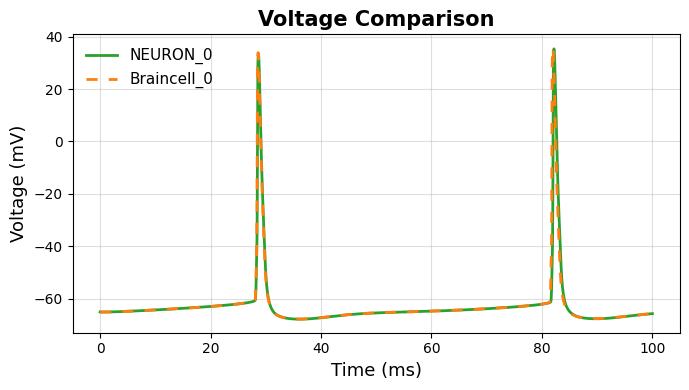

In [7]:
## stim
DT = 0.01
I = step_input(num=nseg, dur=[100, 0, 0], amp=[0, 0, 0], dt=DT)
## simulation
t_braincell, v_braincell = BraincellRun(cell=cell_braincell, I=I, dt=DT)
# plot 
plot_voltage_comparison(
    t_neuron, v_neuron,
    t_braincell, v_braincell,
    indices=range(1)
)

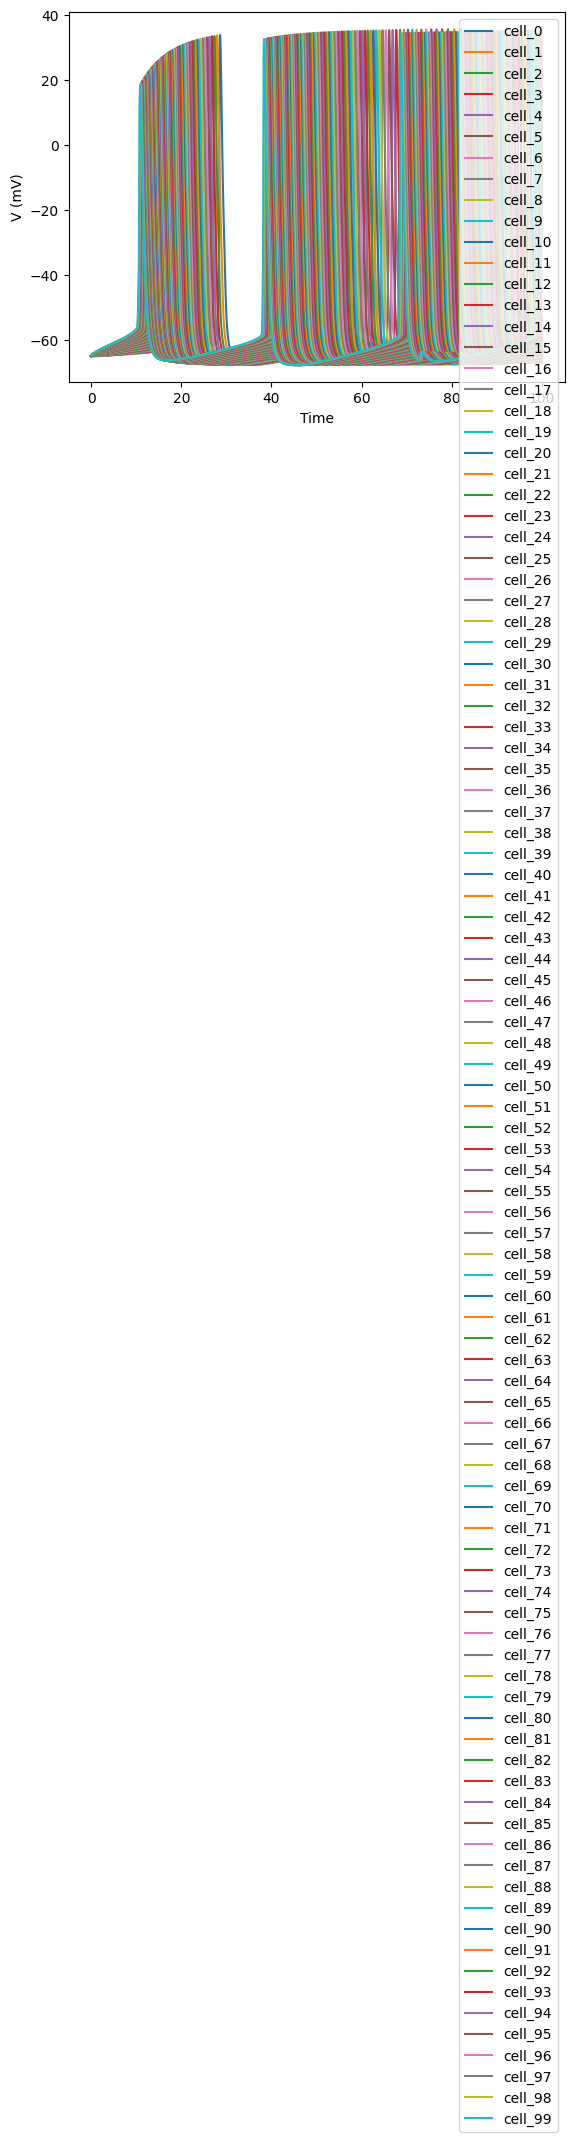

In [18]:
I_pop = u.math.stack([
    step_input(num=nseg, dur=[100, 0, 0], amp=[i * 0.001, 0, 0], dt=DT)
    for i in range(popsize)
], axis=1)  

t_braincell, v_braincell = BraincellRun(cell=cell_braincell, I=I_pop, dt=DT)

v0 = v_braincell[:, :, 0]

for i in range(v0.shape[1]): 
    plt.plot(t_braincell, v0[:, i], label=f'cell_{i}')
 
plt.xlabel("Time")
plt.ylabel("V (mV)")
plt.legend()
plt.show()
